In [1]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 4:  Numerical Differentiation and Quadrature

## Question 1 - Fundamental Theorem of Calculus

**(a)** (15) Write a function that computes the integral of the derivative 

$$I[f] = \int^x_0 f'(\hat{x}) d\hat{x}$$

and returns the error from the expected calculation.  Use a second order accurate centered difference scheme and then a left-hand rule to compute the absolute error.  In this case the left-hand quadrature is

$$Q[f] = f(x_i) \Delta x$$

The function should take in $x$ values and the function $f(x)$ and return a vector of the **errors** for each value $x$ given.

In [2]:
def int_diff_error(x, f):
    """Compute the integral of the derivative and return a vector of errors
    
    :Input:
     - *x* (ndarray) - the linspace we are using for our values
     - *f* (function) - function of x
     
    :Output:
     - *error* (ndarray) - vector of error calculations
    """
    ### INSERT CODE HERE
    #Second order differnce 
    delta_x = x[1] - x[0]
    
    f_prime_hat = numpy.empty(x.shape)
    f_prime_hat[1:-1] = (f(x[2:]) - f(x[:-2])) / (2 * delta_x)

    # Use first-order differences for points at edge of domain
    f_prime_hat[0] = (f(x[1]) - f(x[0])) / delta_x     # Forward Difference at x_0
    f_prime_hat[-1] = (f(x[-1]) - f(x[-2])) / delta_x  # Backward Difference at x_N
    
    #left-hand rule
    Qf = numpy.zeros(x.shape)
    Qf[0] = f_prime_hat[0]*delta_x + f(0)
    for i in xrange(1, x.shape[0]):
        Qf[i] = Qf[i-1] + f_prime_hat[i]*delta_x
    error = numpy.abs(Qf - f(x))
    return error

In [3]:
f = lambda x: 1.0 / (1.0 + 100.0 * x**2)
x = numpy.linspace(0.0, 1.0, 500)
print numpy.max(int_diff_error(x, f))
numpy.testing.assert_allclose(int_diff_error(x, f), numpy.zeros(500), atol=1e-2)
print "Successful FTC evaluation."

0.00670785973681
Successful FTC evaluation.


**(b)** (15) Compute the same as above except reverse the order of the operations, i.e.

$$D[f] = \frac{\text{d}}{\text{d}x} \int^x_0 f(\hat{x}) d\hat{x}$$


In [4]:
def diff_int_error(x, f):
    """Compute the integral of the derivative and return a vector of errors
    
    :Input:
     - *x* (ndarray) - the linspace we are using for our values
     - *f* (function) - function of x
     
    :Output:
     - *error* (ndarray) - vector of error calculations
    """
    ### INSERT CODE HERE
    #left hand scheme
    delta_x = x[1] - x[0]
    
    Qf = numpy.zeros(x.shape)
    Qf[0] = f(x[0])*delta_x + f(0)
    for i in xrange(1, x.shape[0]):
        Qf[i] = Qf[i-1] + f(x[i])*delta_x
    
    #second order difference
    f_prime_hat = numpy.empty(x.shape)
    f_prime_hat[1:-1] = (Qf[2:] - Qf[:-2]) / (2 * delta_x)

    # Use first-order differences for points at edge of domain
    f_prime_hat[0] = (Qf[1] - Qf[0]) / delta_x     # Forward Difference at x_0
    f_prime_hat[-1] = (Qf[-1] - Qf[-2]) / delta_x  # Backward Difference at x_N
    
    error = numpy.abs(f_prime_hat - f(x))
    
    return error

In [5]:
f = lambda x: 1.0 / (1.0 + 100.0 * x**2)
x = numpy.linspace(0.0, 1.0, 500)
print numpy.max(diff_int_error(x, f))
numpy.testing.assert_allclose(diff_int_error(x, f), numpy.zeros(500), atol=1e-2)
print "Successful FTC evaluation."

0.00650713794122
Successful FTC evaluation.


**(c)** (10) Plot the convergence rate for the number of partitions `N = [10,100,200,300,400,500]` on a `loglog` plot by computing the norm over the error given for each $N$ by using the `numpy.linalg.norm` command with `ord=2` vs. the $\Delta x$ used.  Theorize about what you observe regarding the order of convergence.

**Comments**
As per the graph below, we can see the the order of convergence is less that first order. While we would expect the left hand rule to be first order, it may be the errors accumuated from using an interpolant for differentiation that gives us this lower order of convergence. 

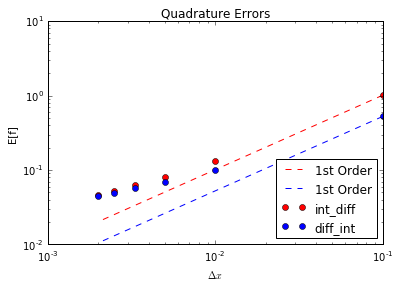

In [6]:
### INSERT CODE HERE
num_partitions = [10,100,200,300,400,500]
f = lambda x: 1.0 / (1.0 + 100.0 * x**2)

delta_x = numpy.empty(len(num_partitions))
error_int_diff = numpy.empty(len(num_partitions))
error_diff_int = numpy.empty(len(num_partitions))

for (j, N) in enumerate(num_partitions):
    x_hat = numpy.linspace(0.0, 1.0, N+1)
    delta_x[j] = x_hat[1] - x_hat[0]
    
    error_int_diff[j] = numpy.linalg.norm(int_diff_error(x_hat, f),ord=2)
    error_diff_int[j] = numpy.linalg.norm(diff_int_error(x_hat, f) , ord=2)

fig = plt.figure()
axes = fig.add_subplot(1,1,1)

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[0], error_int_diff[0], 1.) * delta_x**1., 'r--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[0], error_diff_int[0], 1.) * delta_x**1., 'b--', label="1st Order")
axes.loglog(delta_x, error_int_diff, 'ro', label="int_diff")
axes.loglog(delta_x, error_diff_int, 'bo', label="diff_int")

axes.set_xlabel("$\Delta x$")
axes.set_ylabel("E[f]")
axes.set_title("Quadrature Errors")
axes.legend(loc=4)

plt.show()

## Question 2 - Quadrature

Consider the scaled Fresnel integrals

$$I_c = \int^1_0 \frac{\cos x}{\sqrt{x}} dx~~~~\text{and}~~~~I_s = \int^1_0 \frac{\sin x}{\sqrt{x}} dx$$

which have values

$$I_c = \sqrt{2 \pi} \cdot C\left(\sqrt{\frac{2}{\pi}}\right) \approx 1.8090484758005438$$

$$I_s = \sqrt{2 \pi} \cdot S\left(\sqrt{\frac{2}{\pi}}\right) \approx 0.62053660344676231$$

where the functions $C(x)$ and $S(x)$ can be evaluated by `scipy.special.fresnel`.

**(a)** (10) Write a function that computes both integrals using the  trapezoidal rule with N partitions of equal length "ignoring" the singularity at $x=0$ by setting integrands to 0.

In [7]:
def trap_1(N):
    """Compute the integral of the fresnel functions with trapezoid rule (ignore 0)
    
    :Input:
     - *N* (integer) - Number of partitions
     
    :Output:
     - *Is, Ic* (tuple) - Approximation of the Ic and Is integral 
    """
    ### INSERT CODE HERE
    def f_c(x):
        if x == 0:
            return 0.
        else:
            return numpy.cos(x) / numpy.sqrt(x)
    def f_s(x):
        if x == 0:
            return 0. 
        else:
            return numpy.sin(x) / numpy.sqrt(x)
    
    x = numpy.linspace(0.0,1.0,N+1)
    delta_x = x[1] - x[0]
    
    Qf_c = numpy.zeros(x.shape)
    Qf_s = numpy.zeros(x.shape)
    Qf_c[0] = (f_c(x[1]) + f_c(x[0])) * delta_x / 2.0
    Qf_s[0] = (f_s(x[1]) + f_s(x[0])) * delta_x / 2.0
    for i in xrange(1, N):
        Qf_c[i] = (f_c(x[i + 1]) + f_c(x[i])) * delta_x / 2.0
        Qf_s[i] = (f_s(x[i + 1]) + f_s(x[i])) * delta_x / 2.0
    
    Is = numpy.sum(Qf_s)
    Ic = numpy.sum(Qf_c)
    return Is, Ic

In [8]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = trap_1(200)
error = numpy.abs(Is_hat - Is)
print "Error: %s" % error
numpy.testing.assert_allclose(error, 0.0, atol=1e-4)
print "Computed the integrals correctly using the trapezoidal rule only."    

Error: 7.32497950293e-05
Computed the integrals correctly using the trapezoidal rule only.


**(b)** (10) A weighted Newton-Cotes quadrature rule is a modification of our version of Newton-Cotes quadrature except that we also multiply by a weighting function such that

$$\int^1_0 w(x) f(x) dx = \sum^{N}_{i=1} w_i f(x_i)$$

For the weight $x^{-1/2}$ we can show that 

$$\int^1_0 \frac{f(x)}{\sqrt{x}} dx \approx \frac{2}{3} (2 f(0) + f(1))$$

Combining this formula with the trapezoidal rule approach above, evaluate the integrals again by using the trapezoid rule except for the partition $[0,\Delta x]$ that involves the singularity use the above weighted Newton-Cotes rule.  Note that you will have to map the rule to the partition.

In [9]:
def trap_wnc(N):
    """Compute the integral of the fresnel functions with trapezoid rule 
    
    :Input:
     - *N* (integer) - Number of partitions
     
    :Output:
     - *Is, Ic* (tuple) - Approximation of the Ic and Is integral 
    """
    ### INSERT CODE HERE
    f_c = lambda x: numpy.cos(x) / numpy.sqrt(x)
    f_s = lambda x: numpy.sin(x) / numpy.sqrt(x)
    
    x = numpy.linspace(0.0,1.0,N+1)
    delta_x = x[1] - x[0]
    
    xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
    Qf_s = numpy.zeros(x.shape)
    Qf_c = numpy.zeros(x.shape)
    Qf_s[0] = (delta_x/3) * ((2*f_s(xi_map(0,delta_x,0)))+f_s(xi_map(0,delta_x,1)))
    Qf_c[0] = (delta_x/3) * ((2*f_c(xi_map(0,delta_x,0)))+f_c(xi_map(0,delta_x,1)))
    
    for i in xrange(1, N):
        Qf_c[i] = (f_c(x[i + 1]) + f_c(x[i])) * delta_x / 2.0
        Qf_s[i] = (f_s(x[i + 1]) + f_s(x[i])) * delta_x / 2.0
        
    Is = numpy.sum(Qf_s)
    Ic = numpy.sum(Qf_c)
    return Is, Ic
    

In [10]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = trap_wnc(200)
error = numpy.abs(Is_hat - Is)
print "Error: %s" % error
numpy.testing.assert_allclose(error, 0.0, atol=1e-4)
print "Computed the integrals correctly using the trapezoidal and Newton-Cotes rules."    

Error: 3.44913784502e-05
Computed the integrals correctly using the trapezoidal and Newton-Cotes rules.


**(c)** (10) Do a change of variables $x = t^2$ and evaluate each integral using the trapezoidal rule for the entire domain.

**Change of variables**

$$x = t^2$$
$$dx = 2t dt$$
$$I_c = \int^1_0 \frac{\cos t^2}{t} 2t dt~~~~\text{and}~~~~I_s = \int^1_0 \frac{\sin t^2}{t} 2tdt$$
$$I_c = \int^1_0 2\cos t^2 dt~~~~\text{and}~~~~I_s = \int^1_0 2 \sin t^2 dt$$



In [11]:
def trap_transformed(N):
    """Compute the integral of the fresnel functions with trapezoid rule after change of variables
    
    :Input:
     - *N* (integer) - Number of partitions
     
    :Output:
     - *Is, Ic* (tuple) - Approximation of the Ic and Is integral 
    """
    ### INSERT CODE HERE
    f_c = lambda t: 2*numpy.cos(t**2)
    f_s = lambda t: 2*numpy.sin(t**2)
    
    x = numpy.linspace(0.0,1.0,N+1)
    delta_x = x[1] - x[0]
    
    Qf_c = numpy.zeros(x.shape)
    Qf_s = numpy.zeros(x.shape)
    Qf_c[0] = (f_c(x[1]) + f_c(x[0])) * delta_x / 2.0
    Qf_s[0] = (f_s(x[1]) + f_s(x[0])) * delta_x / 2.0
    for i in xrange(1, N):
        Qf_c[i] = (f_c(x[i + 1]) + f_c(x[i])) * delta_x / 2.0
        Qf_s[i] = (f_s(x[i + 1]) + f_s(x[i])) * delta_x / 2.0
    
    Is = numpy.sum(Qf_s)
    Ic = numpy.sum(Qf_c)
    return Is, Ic

In [12]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = trap_transformed(200)
error = numpy.abs(Is_hat - Is)
print "Error: %s" % error
numpy.testing.assert_allclose(error, 0.0, atol=1e-5)
print "Computed the integrals correctly using the trapezoidal rule."    

Error: 4.50254425033e-06
Computed the integrals correctly using the trapezoidal rule.


**(d)** (10) Do the same as in part (c) but use 3-point Gauss-Legendre quadrature.

In [13]:
def gauss_legendre_3(N):
    """Compute the integral of the fresnel functions with gaussian-legendre using 3 points
    
    :Input:
     - *N* (integer) - Number of partitions
     
    :Output:
     - *Is, Ic* (tuple) - Approximation of the Ic and Is integral 
    """
    ### INSERT CODE HERE
    f_c = lambda t: 2*numpy.cos(t**2)
    f_s = lambda t: 2*numpy.sin(t**2)
    
    x = numpy.linspace(0.0,1.0,N+1)
    delta_x = x[1] - x[0]
    
    xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
    xi_0 = -numpy.sqrt(3.0 / 5.0)
    xi_1 =  numpy.sqrt(3.0 / 5.0)
    
    Qf_c = numpy.zeros(x.shape)
    Qf_s = numpy.zeros(x.shape)
    Qf_c[0] = (((8.0/9.0) * f_c(xi_map(x[0],x[1],0))) + (5.0/9.0)*(f_c(xi_map(x[0], x[1],xi_0)) + f_c(xi_map(x[0],x[1],xi_1)))) * (delta_x/2.0)
    Qf_s[0] = (((8.0/9.0) * f_s(xi_map(x[0],x[1],0))) + (5.0/9.0)*(f_s(xi_map(x[0], x[1],xi_0)) + f_s(xi_map(x[0],x[1],xi_1)))) * (delta_x/2.0)
    for i in xrange(1, N):
        Qf_c[i] = (((8.0/9.0) * f_c(xi_map(x[i],x[i+1],0))) + (5.0/9.0)*(f_c(xi_map(x[i], x[i+1],xi_0)) + f_c(xi_map(x[i],x[i+1],xi_1)))) * (delta_x/2.0)
        Qf_s[i] = (((8.0/9.0) * f_s(xi_map(x[i],x[i+1],0))) + (5.0/9.0)*(f_s(xi_map(x[i], x[i+1],xi_0)) + f_s(xi_map(x[i],x[i+1],xi_1)))) * (delta_x/2.0)

    Is = numpy.sum(Qf_s)
    Ic = numpy.sum(Qf_c)
    return Is, Ic

In [14]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = gauss_legendre_3(10)
error = numpy.abs(Is_hat - Is)
print "Error: %s" % error
numpy.testing.assert_allclose(error, 0.0, atol=1e-10)
print "Computed the integrals correctly using the trapezoidal and Newton-Cotes rules."    

Error: 8.57063309212e-11
Computed the integrals correctly using the trapezoidal and Newton-Cotes rules.


**(e)** (10) Check the order of accuracy for each of the methods above and plot these on a `loglog` plot with appropriate reference lines to indicate the order of each.

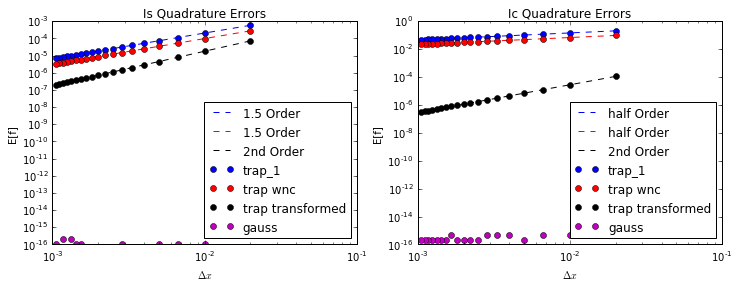

In [15]:
### INSERT CODE HERE
num_partitions = range(50,1000,50)
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)

delta_x = numpy.empty(len(num_partitions))
error_trap_1 = numpy.empty((len(num_partitions),2))
error_trap_wnc = numpy.empty((len(num_partitions),2))
error_trap_transformed = numpy.empty((len(num_partitions),2))
error_trap_gauss = numpy.empty((len(num_partitions),2))

for (j, N) in enumerate(num_partitions):
    x_hat = numpy.linspace(0.0, 1.0, N+1)
    delta_x[j] = x_hat[1] - x_hat[0]
    
    error_trap_1[j, 0] = numpy.abs(Is - trap_1(N)[0])
    error_trap_1[j, 1] = numpy.abs(Ic - trap_1(N)[1])
    
    error_trap_wnc[j, 0] = numpy.abs(Is - trap_wnc(N)[0])
    error_trap_wnc[j, 1] = numpy.abs(Ic - trap_wnc(N)[1])
    
    error_trap_transformed[j, 0] = numpy.abs(Is - trap_transformed(N)[0])
    error_trap_transformed[j, 1] = numpy.abs(Ic - trap_transformed(N)[1])
    
    error_trap_gauss[j, 0] = numpy.abs(Is - gauss_legendre_3(N)[0])
    error_trap_gauss[j, 1] = numpy.abs(Ic - gauss_legendre_3(N)[1])

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth()*2)

axes = fig.add_subplot(1,2,1)

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[0], error_trap_1[0,0], 1.5) * delta_x**1.5, 'b--', label="1.5 Order")
axes.loglog(delta_x, order_C(delta_x[0], error_trap_wnc[0,0], 1.5) * delta_x**1.5, 'r--', label="1.5 Order")
axes.loglog(delta_x, order_C(delta_x[0], error_trap_transformed[0,0], 2.0) * delta_x**2.0, 'k--', label="2nd Order")
axes.loglog(delta_x, error_trap_1[:,0], 'bo', label="trap_1")
axes.loglog(delta_x, error_trap_wnc[:,0], 'ro', label="trap wnc")
axes.loglog(delta_x, error_trap_transformed[:,0], 'ko', label="trap transformed")
axes.loglog(delta_x, error_trap_gauss[:,0], 'mo', label="gauss")

axes.set_xlabel("$\Delta x$")
axes.set_ylabel("E[f]")
axes.set_title("Is Quadrature Errors")
axes.legend(loc=4)

axes = fig.add_subplot(1,2,2)

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[0], error_trap_1[0,1], .5) * delta_x**.5, 'b--', label="half Order")
axes.loglog(delta_x, order_C(delta_x[0], error_trap_wnc[0,1], .5) * delta_x**.5, 'r--', label="half Order")
axes.loglog(delta_x, order_C(delta_x[0], error_trap_transformed[0,1], 2.0) * delta_x**2.0, 'k--', label="2nd Order")
axes.loglog(delta_x, error_trap_1[:,1], 'bo', label="trap_1")
axes.loglog(delta_x, error_trap_wnc[:,1], 'ro', label="trap wnc")
axes.loglog(delta_x, error_trap_transformed[:,1], 'ko', label="trap transformed")
axes.loglog(delta_x, error_trap_gauss[:,1], 'mo', label="gauss")

axes.set_xlabel("$\Delta x$")
axes.set_ylabel("E[f]")
axes.set_title("Ic Quadrature Errors")
axes.legend(loc=4)

plt.show()


**(f)** (10) Comment on the results of this question and the vast differences in convergence rates even between the two integrations (why is $I_c$ less accurate than $I_s$).

The results above show that as expected, the gaussian-legendre is the optimal approach. Furthermore, our transformed trapezoid version where we performed a change of variables performs with second order convergence. The difference here between our initial trapezoid method is that we got rid of the divergence at x = 0 with our first partition. Thus, the four methods show a progression in evalutaing these fresnel functions. The first method naively uses the the trapezoid rule ignoring the x=0 point. Next, we took into account the divergence at x=0 using an affine transofrmation to set up our intial bracket. Therefore, our intial point starts at a lower error but the order of convergence is still the same as we continue with the trapezoid rule. The order of convergence increases with the change in varaible approch because the function changes to something that is easier to work with and without a divergence. Thus this change in variable approach is best out of the three. 

The reason that the trapezoid rule for the change in variables performs better is because the graph of $2\sin(t^2)$ almost looks like a line so the approximations from the trapezoid rule will be better. There is more curvature in the $sin(x)/\sqrt(x)$ graph causing a different order of convergence.  

The reason there are vast differences between the convergence rates of Ic and Is is because of the nature of sin and cosine functions. The Ic function is cosine meaning that the endpoint if a non-zero number whereas the endpoint for the sin function is 0. Thus, when we are ignoring or using a affine transform for x=0, we are not approximating the cosine function as well as we are the sin function. Thus, since order_c function taks the first element, these orders will be different. 